# 1. Data Preparation

## 1.1: Load the Data
Import necessary libraries: pandas, numpy, matplotlib, seaborn and ignoring warings

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Read the three sheets from the Excel file into separate DataFrames using pandas.read_excel.

In [15]:
file_path = "Desktop/Uplairs/Assignment.xlsx"

user_details = pd.read_excel(file_path, sheet_name="UserDetails.csv")
cooking_sessions = pd.read_excel(file_path, sheet_name="CookingSessions.csv")
order_details = pd.read_excel(file_path, sheet_name="OrderDetails.csv")

Display the first few rows to understand the structure

In [30]:
print(user_details.head())

  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  


In [32]:
print(cooking_sessions.head())

  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad      Lunch 2024-12-01 12:00:00   
2       S003    U003  Grilled Chicken     Dinner 2024-12-02 19:30:00   
3       S004    U001         Pancakes  Breakfast 2024-12-02 07:30:00   
4       S005    U004     Caesar Salad      Lunch 2024-12-03 13:00:00   

          Session End  Duration (mins)  Session Rating  
0 2024-12-01 19:30:00               30             4.5  
1 2024-12-01 12:20:00               20             4.0  
2 2024-12-02 20:10:00               40             4.8  
3 2024-12-02 08:00:00               30             4.2  
4 2024-12-03 13:15:00               15             4.7  


In [34]:
print(order_details.head())

   Order ID User ID Order Date  Meal Type        Dish Name Order Status  \
0      1001    U001 2024-12-01     Dinner        Spaghetti    Completed   
1      1002    U002 2024-12-01      Lunch     Caesar Salad    Completed   
2      1003    U003 2024-12-02     Dinner  Grilled Chicken     Canceled   
3      1004    U001 2024-12-02  Breakfast         Pancakes    Completed   
4      1005    U004 2024-12-03      Lunch     Caesar Salad    Completed   

   Amount (USD) Time of Day  Rating Session ID  
0          15.0       Night     5.0       S001  
1          10.0         Day     4.0       S002  
2          12.5       Night     NaN       S003  
3           8.0     Morning     4.0       S004  
4           9.0         Day     4.0       S005  


## 1.2 Explore the Data
We use info() to check the data types and missing values, and describe() for statistical summary.

In [40]:
print(user_details.info())
print(user_details.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 852.0+ bytes
None
             Age    Registration Date  Total Orders
count  10.000000                   10     10.000000
mean   31.800000  2023-05-27 02:24:00      9.400000
min    25.000000  2023-01-15 00:00:00      5.000000
25%    

In [42]:
print(cooking_sessions.info())
print(cooking_sessions.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Session ID       16 non-null     object        
 1   User ID          16 non-null     object        
 2   Dish Name        16 non-null     object        
 3   Meal Type        16 non-null     object        
 4   Session Start    16 non-null     datetime64[ns]
 5   Session End      16 non-null     datetime64[ns]
 6   Duration (mins)  16 non-null     int64         
 7   Session Rating   16 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 1.1+ KB
None
                    Session Start                    Session End  \
count                          16                             16   
mean   2024-12-05 02:50:37.500000  2024-12-05 03:20:56.249999872   
min           2024-12-01 12:00:00            2024-12-01 12:20:00   
25%       

In [44]:
print(order_details.info())
print(order_details.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      16 non-null     int64         
 1   User ID       16 non-null     object        
 2   Order Date    16 non-null     datetime64[ns]
 3   Meal Type     16 non-null     object        
 4   Dish Name     16 non-null     object        
 5   Order Status  16 non-null     object        
 6   Amount (USD)  16 non-null     float64       
 7   Time of Day   16 non-null     object        
 8   Rating        14 non-null     float64       
 9   Session ID    16 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.4+ KB
None
          Order ID           Order Date  Amount (USD)     Rating
count    16.000000                   16     16.000000  14.000000
mean   1008.500000  2024-12-04 12:00:00     11.250000   4.285714
min    1001.0000

To check any null values are there in the data 

## 1.3: Clean the Data
Handle Missing Values:

In [47]:
print(user_details.isnull().sum())

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64


In [49]:
print(cooking_sessions.isnull().sum())

Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64


In [51]:
print(order_details.isnull().sum())

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


Drop rows with missing values


In [56]:
user_details = user_details.dropna()
cooking_sessions = cooking_sessions.dropna()
order_details = order_details.dropna()

Convert Registration Date, Session Start, and Session End to datetime.

In [59]:
user_details['Registration Date'] = pd.to_datetime(user_details['Registration Date'])
cooking_sessions['Session Start'] = pd.to_datetime(cooking_sessions['Session Start'])
cooking_sessions['Session End'] = pd.to_datetime(cooking_sessions['Session End'])
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])

Remove any duplicate records.

In [62]:
user_details.drop_duplicates(inplace=True)
cooking_sessions.drop_duplicates(inplace=True)
order_details.drop_duplicates(inplace=True)

# Step 2: Data Integration
## 2.1 Merge Datasets
We need to merge the datasets based on the User ID and Session ID. First, merge UserDetails and CookingSessions on User ID, then merge the result with OrderDetails using Session ID.

In [67]:
# Merge UserDetails with CookingSessions based on 'User ID'
merged_data = pd.merge(user_details, cooking_sessions, on="User ID", how="inner")

# Merge the result with OrderDetails based on 'Session ID'
merged_data = pd.merge(merged_data, order_details, on="Session ID", how="left")

# Display merged data
print(merged_data.head())

  User ID_x      User Name  Age     Location Registration Date         Phone  \
0      U001  Alice Johnson   28     New York        2023-01-15  123-456-7890   
1      U001  Alice Johnson   28     New York        2023-01-15  123-456-7890   
2      U001  Alice Johnson   28     New York        2023-01-15  123-456-7890   
3      U002      Bob Smith   35  Los Angeles        2023-02-20  987-654-3210   
4      U002      Bob Smith   35  Los Angeles        2023-02-20  987-654-3210   

             Email Favorite Meal  Total Orders Session ID  ... Session Rating  \
0  alice@email.com        Dinner            12       S001  ...            4.5   
1  alice@email.com        Dinner            12       S004  ...            4.2   
2  alice@email.com        Dinner            12       S009  ...            4.9   
3    bob@email.com         Lunch             8       S002  ...            4.0   
4    bob@email.com         Lunch             8       S006  ...            4.3   

  Order ID User ID_y Order Date 

In [69]:
print(merged_data.columns)

Index(['User ID_x', 'User Name', 'Age', 'Location', 'Registration Date',
       'Phone', 'Email', 'Favorite Meal', 'Total Orders', 'Session ID',
       'Dish Name_x', 'Meal Type_x', 'Session Start', 'Session End',
       'Duration (mins)', 'Session Rating', 'Order ID', 'User ID_y',
       'Order Date', 'Meal Type_y', 'Dish Name_y', 'Order Status',
       'Amount (USD)', 'Time of Day', 'Rating'],
      dtype='object')


In [71]:
# Rename columns for clarity
merged_data.rename(
    columns={
        'User ID_x': 'User ID',  # Retain the User ID from UserDetails
        'Dish Name_x': 'Dish Name',  # Retain Dish Name from CookingSessions
        'Meal Type_x': 'Meal Type',  # Retain Meal Type from CookingSessions
    },
    inplace=True
)

# Optionally drop redundant columns
merged_data.drop(columns=['User ID_y', 'Dish Name_y', 'Meal Type_y'], inplace=True)

# Verify the updated column names
print(merged_data.columns)

Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders', 'Session ID', 'Dish Name',
       'Meal Type', 'Session Start', 'Session End', 'Duration (mins)',
       'Session Rating', 'Order ID', 'Order Date', 'Order Status',
       'Amount (USD)', 'Time of Day', 'Rating'],
      dtype='object')


## 2.2 Feature Engineering
Create new features such as:

Order Frequency: Number of orders divided by the number of days since the user's registration.

Cooking Engagement: Total cooking sessions per user.

Revenue Contribution: Sum of the Amount (USD) for each user

In [77]:
# Calculate Registration Duration in days
merged_data['Registration Duration'] = (
    pd.to_datetime('today') - pd.to_datetime(merged_data['Registration Date'])
).dt.days

# Calculate Order Frequency (Total Orders per Day)
merged_data['Total Orders'] = merged_data.groupby('User ID')['Order ID'].transform('count')
merged_data['Order Frequency'] = merged_data['Total Orders'] / merged_data['Registration Duration']

# Calculate Cooking Engagement (Total Cooking Sessions per User)
merged_data['Cooking Engagement'] = merged_data.groupby('User ID')['Session ID'].transform('count')

# Calculate Revenue Contribution (Total Amount per User)
merged_data['Revenue Contribution'] = merged_data.groupby('User ID')['Amount (USD)'].transform('sum')

# Display the updated DataFrame
print(merged_data.head())


  User ID      User Name  Age     Location Registration Date         Phone  \
0    U001  Alice Johnson   28     New York        2023-01-15  123-456-7890   
1    U001  Alice Johnson   28     New York        2023-01-15  123-456-7890   
2    U001  Alice Johnson   28     New York        2023-01-15  123-456-7890   
3    U002      Bob Smith   35  Los Angeles        2023-02-20  987-654-3210   
4    U002      Bob Smith   35  Los Angeles        2023-02-20  987-654-3210   

             Email Favorite Meal  Total Orders Session ID  ... Order ID  \
0  alice@email.com        Dinner             3       S001  ...   1001.0   
1  alice@email.com        Dinner             3       S004  ...   1004.0   
2  alice@email.com        Dinner             3       S009  ...   1009.0   
3    bob@email.com         Lunch             3       S002  ...   1002.0   
4    bob@email.com         Lunch             3       S006  ...   1006.0   

  Order Date Order Status Amount (USD)  Time of Day  Rating  \
0 2024-12-01    C

In [79]:
# Replace infinite values with 0
merged_data['Order Frequency'] = merged_data['Order Frequency'].replace([float('inf'), -float('inf')], 0)

# Fill NaN values with 0
merged_data['Order Frequency'] = merged_data['Order Frequency'].fillna(0)
merged_data['Cooking Engagement'] = merged_data['Cooking Engagement'].fillna(0)
merged_data['Revenue Contribution'] = merged_data['Revenue Contribution'].fillna(0)

In [81]:
print(merged_data[['Order Frequency', 'Cooking Engagement', 'Revenue Contribution']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order Frequency       16 non-null     float64
 1   Cooking Engagement    16 non-null     int64  
 2   Revenue Contribution  16 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 516.0 bytes
None


# Step 3: Data Analysis
## 3.1 Explore the relationship between cooking sessions and user orders.

In [84]:
# Correlation between Cooking Engagement and Total Orders
correlation = merged_data[['Cooking Engagement', 'Total Orders']].corr()
print("Correlation between Cooking Engagement and Total Orders:")
print(correlation)

# Average Order Frequency by Cooking Engagement Levels
cooking_engagement_bins = pd.cut(
    merged_data['Cooking Engagement'],
    bins=[0, 1, 5, 10, 20, 100],
    labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High']
)
order_frequency_by_engagement = merged_data.groupby(cooking_engagement_bins)['Order Frequency'].mean()
print("Order Frequency by Cooking Engagement Levels:")
print(order_frequency_by_engagement)


Correlation between Cooking Engagement and Total Orders:
                    Cooking Engagement  Total Orders
Cooking Engagement              1.0000        0.5547
Total Orders                    0.5547        1.0000
Order Frequency by Cooking Engagement Levels:
Cooking Engagement
Very Low     0.001919
Low          0.003433
Moderate          NaN
High              NaN
Very High         NaN
Name: Order Frequency, dtype: float64


## 3.2 Top 10 Most Ordered Dishes

In [90]:
# Top 10 Most Ordered Dishes
popular_dishes = merged_data['Dish Name'].value_counts().head(10)
print("Top 10 Most Ordered Dishes:")
print(popular_dishes)

# Order Count by Meal Type
meal_type_trends = merged_data['Meal Type'].value_counts()
print("Order Count by Meal Type:")
print(meal_type_trends)

Top 10 Most Ordered Dishes:
Dish Name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64
Order Count by Meal Type:
Meal Type
Dinner       8
Lunch        5
Breakfast    3
Name: count, dtype: int64


## 3.3 Average Order Frequency and Cooking Engagement by Age Group

In [96]:
# Average Order Frequency and Cooking Engagement by Age Group
age_bins = pd.cut(
    merged_data['Age'],
    bins=[0, 18, 25, 35, 50, 100],
    labels=['<18', '18-25', '26-35', '36-50', '50+']
)
age_analysis = merged_data.groupby(age_bins)[['Order Frequency', 'Cooking Engagement']].mean()
print("Order Frequency and Cooking Engagement by Age Group:")
print(age_analysis)

# Top 5 Locations by Revenue Contribution
top_locations = merged_data.groupby('Location')['Revenue Contribution'].sum().sort_values(ascending=False).head(5)
print("Top 5 Locations by Revenue Contribution:")
print(top_locations)

Order Frequency and Cooking Engagement by Age Group:
       Order Frequency  Cooking Engagement
Age                                       
<18                NaN                 NaN
18-25         0.001828            1.000000
26-35         0.003819            2.454545
36-50         0.001636            2.500000
50+                NaN                 NaN
Top 5 Locations by Revenue Contribution:
Location
New York         105.0
Los Angeles       93.0
Seattle           45.0
San Francisco     43.0
Chicago           25.5
Name: Revenue Contribution, dtype: float64


# Step 4: Visualization

## 4.1  Heatmap of correlations

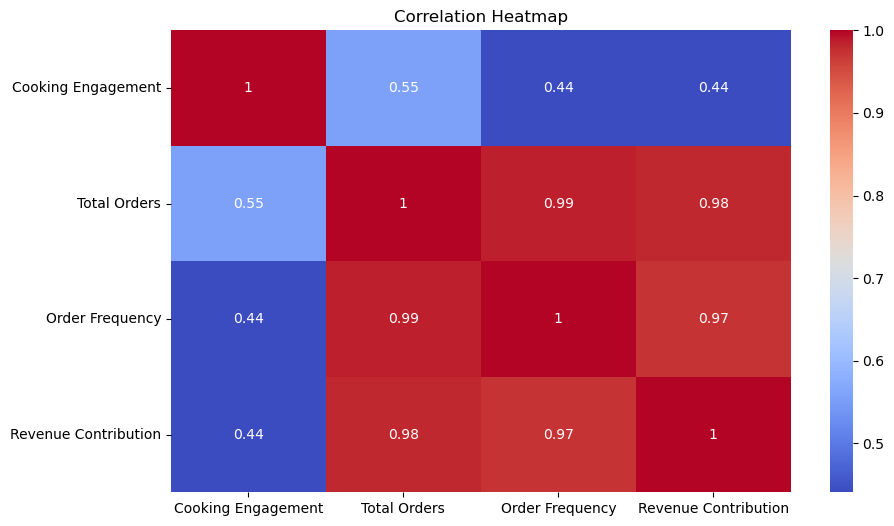

In [101]:
# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data[['Cooking Engagement', 'Total Orders', 'Order Frequency', 'Revenue Contribution']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## 4.2 Bar chart for top 10 dishes

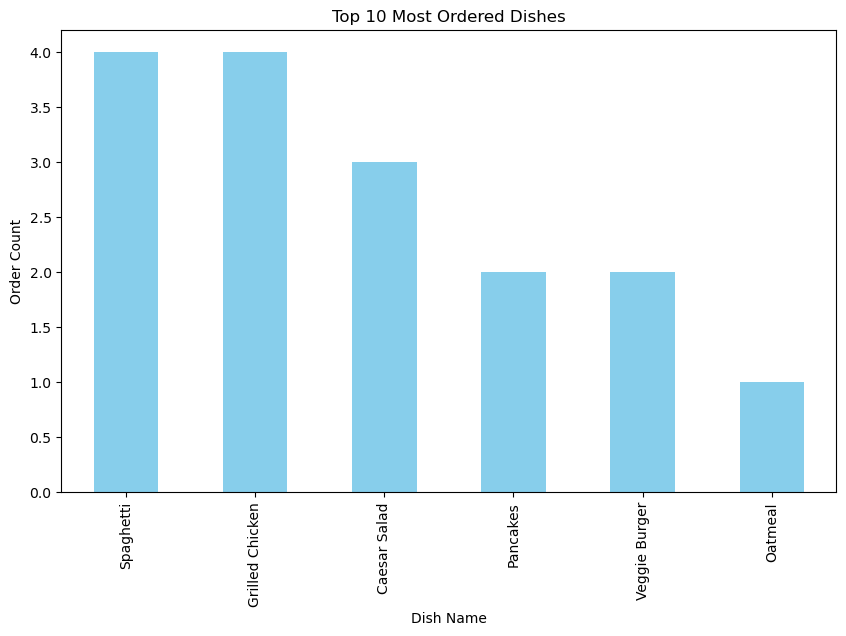

In [104]:
# Bar chart for top 10 dishes
popular_dishes.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Top 10 Most Ordered Dishes")
plt.xlabel("Dish Name")
plt.ylabel("Order Count")
plt.show()

## 4.3  Bar chart for age analysis

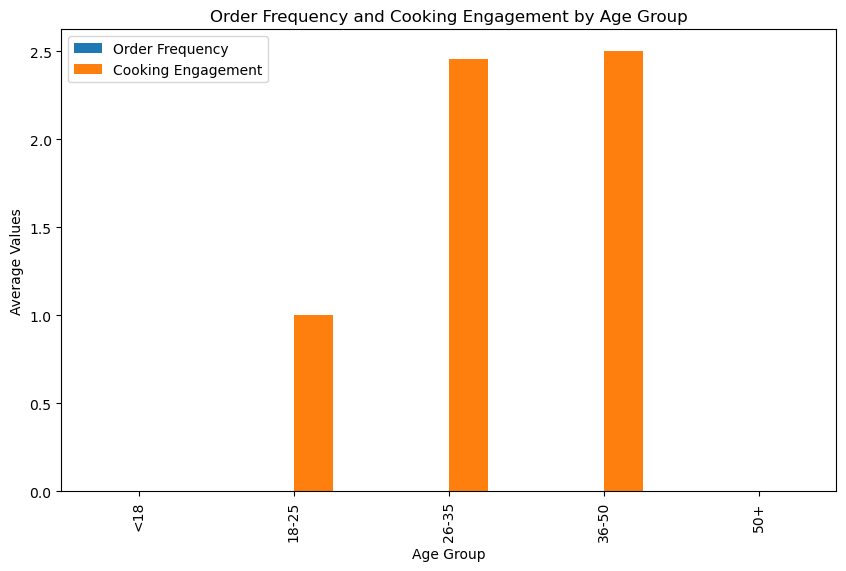

In [113]:
# Bar chart for age analysis
age_analysis.plot(kind='bar', figsize=(10, 6))
plt.title("Order Frequency and Cooking Engagement by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Values")
plt.legend(["Order Frequency", "Cooking Engagement"])
plt.show()